# Notebook de Análise Exploratória de Dados em uma Amostra de Dados da Amazon



No universo digital da Amazon, uma das gigantes do comércio eletrônico e serviços em nuvem, reside um tesouro de dados massivos que impulsionam suas operações globais. Neste notebook temos uma amostra das riquezas contidas nesse vasto banco de dados, que abrange as informações sobre os produtos, seus valores e a análise que os usuarios fizeram.


A análise exploratória de dados é uma etapa fundamental no processo de extração de insights e tomada de decisões embasadas em dados. Neste contexto, nossa jornada começará pela compreensão da estrutura e escala dessa amostra de dados da Amazon.


Ao longo deste notebook, mergulharemos nas questões que podem ser respondidas por meio desses dados: Quais produtos são mais vendidos? Quais a média de valores dos produtos? Quais são os produtos com maior taxa de satisfação?


Para auxiliar nessa exploração, faremos uso de ferramentas e técnicas de análise de dados, visualização e estatística descritiva. Vamos identificar padrões, tendências e anomalias que podem nos ajudar a entender melhor a amostra destes dados da Amazon.


Ao final desse notebook, teremos uma análise geral sobre os principais dados da disponíveis da Amazon, uma das empresas com maior repositório de data do mundo.






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Importando as Bibliotecas e Planilhas

Aqui estamos importando as bibliotecas que serão usadas para fazer a a análise exploratoria ao decorrer deste notebook e também carregamos os data frames da Amazon com os produtos e avaliações.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dados = pd.read_csv('/content/dados.csv',encoding='utf-8')
avaliacoes = pd.read_csv('/content/avaliacoes.csv',encoding='utf-8')

# Limpeza de Dados

Antes de começar a manipular os dados, uma visualização simples é feita para que se saiba os conteudos dos data frames.

In [ ]:
##Visualzação do data frame das Avaliações
avaliacoes.head()

,product_id,user_id,user_name,review_id,review_title,review_content,img_link
0,B07JW9H4J1,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...
1,B098NS6PVG,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...
2,B096MSW6CT,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...
3,B08HDJ86NZ,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...
4,B08CF3B7N1,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...


In [ ]:
##Visualização do data frames dos Dados
dados.head()

,product_id,product_name,category,actual_price,product_price,rating,rating_count,about_product,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,"₹399,00","₹1.099,00","4,5",24269,High Compatibility : Compatible With iPhone 12...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹349,00",4,43994,"Compatible with all Type C enabled devices, be...",https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,"₹199,00","₹1.899,00","4,52",7928,【 Fast Charger& Data Sync】-With built-in safet...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,"₹329,00","₹699,00","4,5",94363,The boAt Deuce USB 300 2 in 1 cable is compati...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,"₹154,00","₹399,00","4,5",16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,https://www.amazon.in/Portronics-Konnect-POR-1...


Pela visualização feita da mostra acima, podemos perceber que temos os caracteres de rupias que precisam ser removidos e as pontuações formatadas adequadamente para poder trabalhar com o data frame.
Removemos então os carácteres de rúpias e formatamos os valores do nosso data frame adequadamente.

In [ ]:
##Limpamos os dados da coluna actual_price e a formatamos adequadamente
dados['actual_price'] = dados['actual_price'].str.strip().str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
dados['actual_price'] = pd.to_numeric(dados['actual_price'])

<ipython-input-7-c1565c50b8cd>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['actual_price'] = dados['actual_price'].str.strip().str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


In [ ]:
##Limpamos os dados da coluna product_price e a formatamos adequadamente
dados['product_price'] = dados['product_price'].str.strip().str.replace('₹', '').str.replace('.', '').str.replace(',', '.')
dados['procut_price'] = pd.to_numeric(dados['product_price'])

<ipython-input-8-3d69299da2c7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados['product_price'] = dados['product_price'].str.strip().str.replace('₹', '').str.replace('.', '').str.replace(',', '.')


In [ ]:
##Formatamos a coluna rating adequadamente
dados['rating'] = dados['rating'].str.replace(',','.')
dados['rating'] =  pd.to_numeric(dados['rating'])

# Analise Descritiva de Dados

Agora começaremos a fazer algumas manipulações de dados.
Iremos primeiro integrar a coluna de 'Reviews' do data frame Avaliações no data frame Dados.

In [ ]:
dados['review_title'] = avaliacoes['review_title']
dados['review_content'] = avaliacoes['review_content']

Vamos então dividir a coluna "category" em duas novas colunas, para que possam ser mais fáceis de visualizar. Vamos divi-las em categorias e subcategorias.

In [ ]:
dados['categoria'] =  dados['category'].str.split('|').str[0]

In [ ]:
dados['subcategoria'] = dados['category'].str.split('|')
dados['subcategoria'] = dados['subcategoria'].apply(lambda x: '|'.join(x[1:2]))


Para que tenhamos uma noção mais real dos preços, criaremos uma coluna nova com o preço dos produtos sendo convertido para reais.

In [ ]:
taxa_de_cambio = 0.053

dados['preco_real'] =  dados['actual_price'] * taxa_de_cambio

Estipularemos agora alguns valores para utilizarmos nos gráficos futuramente.

In [ ]:
## Criar uma variavel para filtrar os produtos com nota de avaliação e depois contá-los
dados_filtrados = dados[dados['rating'] > 0.0]
contagem_ratings = dados_filtrados['rating'].value_counts().sort_index()



In [ ]:
## Vamos agora criar variaveis para filtrar os preços abaixo de R$50, entre R$50 e R$500 e acima de R$500
valores_abaixo_de_50 = dados[dados['preco_real'] < 50]
valores_entre_50_e_500 = dados[(dados['preco_real'] >= 50) & (dados['preco_real'] <= 500)]
valores_acima_de_500 = dados[dados['preco_real'] > 500]

contagem_abaixo_de_50 = len(valores_abaixo_de_50)
contagem_entre_50_e_500 = len(valores_entre_50_e_500)
contagem_acima_de_500 = len(valores_acima_de_500)


# Dados para o gráfico
categorias = ['Valores abaixo de 50', 'Valores entre 50 e 500', 'Valores acima de 500']
contagens = [contagem_abaixo_de_50, contagem_entre_50_e_500, contagem_acima_de_500]



# Gráficos e Visualizações

Primeiro, faremos o gráfico para analisar o número de avaliações por notas.

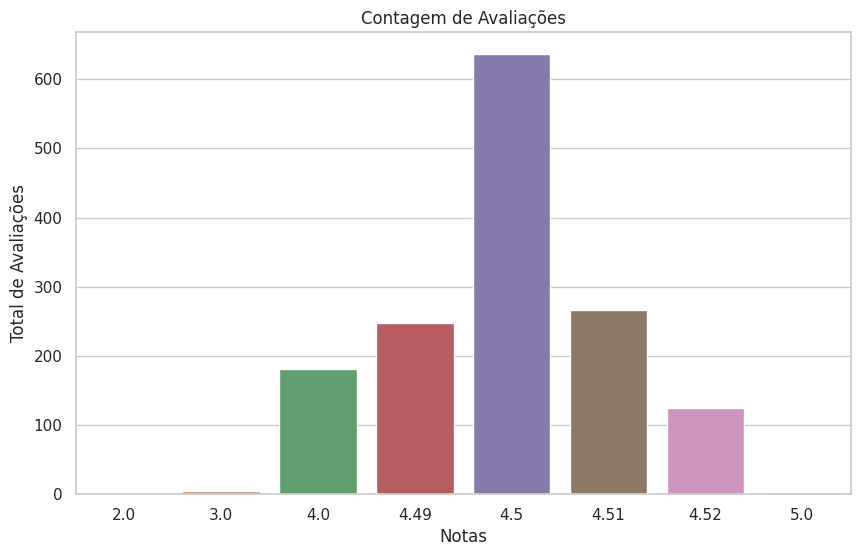

In [ ]:
plt.figure(figsize=(10, 6))  # Ajuste o tamanho do gráfico conforme necessário
sns.barplot(x=contagem_ratings.index, y=contagem_ratings.values)
plt.xlabel('Notas')
plt.ylabel('Total de Avaliações')
plt.title('Contagem de Avaliações')
plt.show()

Em seguida, faremos um gráfico para ver a distribuição de notas nos três intervalos de valores preestabicelidos.

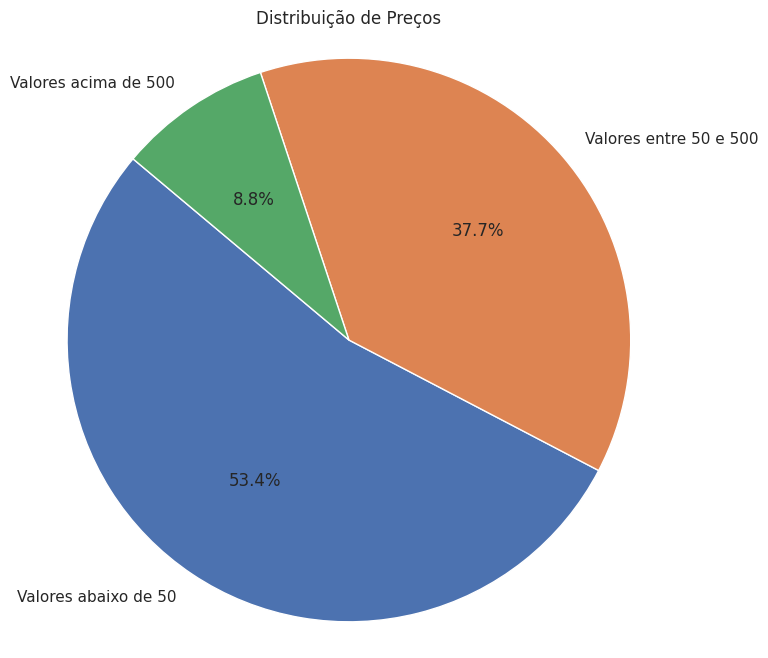

In [ ]:
#Gráfico da Distribuição de Preços
plt.figure(figsize=(8, 8))
plt.title('Distribuição de Preços')
sns.set_palette("pastel")  # Escolha uma paleta de cores
sns.set(style="whitegrid")
plt.pie(contagens, labels=categorias, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Isso garante que o gráfico seja uma pizza perfeita (aspecto igual)
plt.show()

E por ultimo, faremos dois gráficos.
Um para analisarmos o total de produtos em uma categoria e em seguida, um outro gráfico com as subcategorias inseridas nas barras.


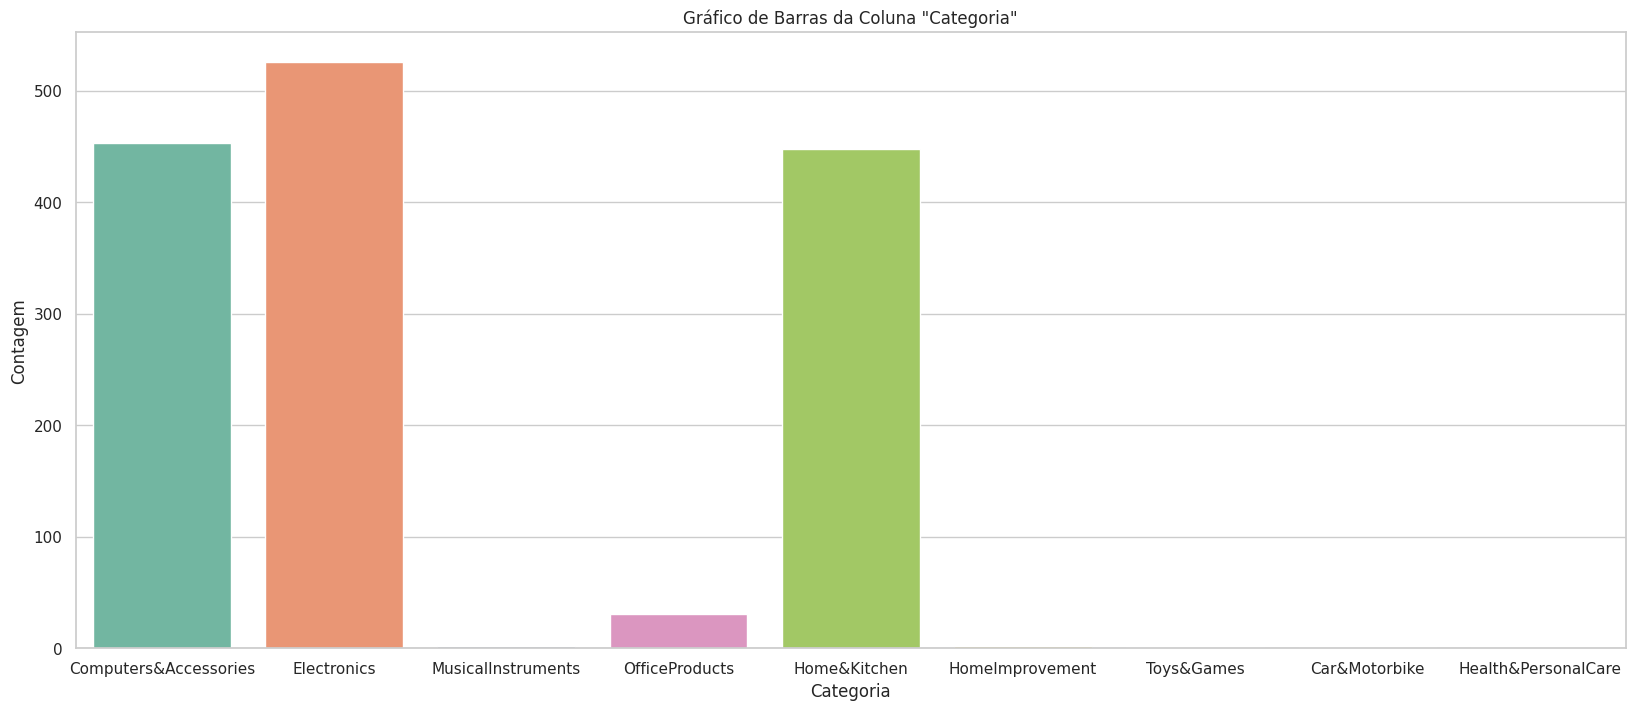

In [ ]:
#Gráfico das Categorias de Produtos
plt.figure(figsize=(20, 8))
sns.countplot(data=dados, x='categoria', palette='Set2')
plt.title('Gráfico de Barras da Coluna "Categoria"')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.show()

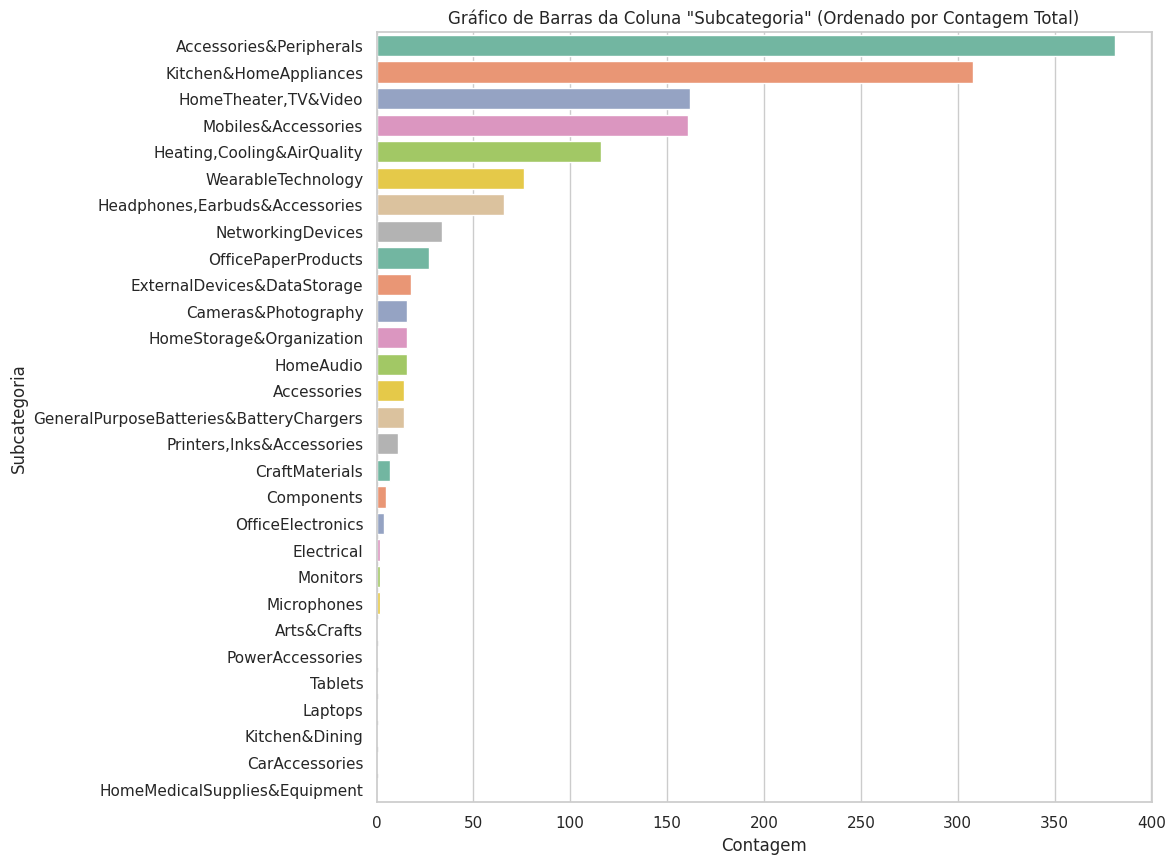

In [ ]:
plt.figure(figsize=(10, 10))  # Alterando o tamanho para a orientação horizontal

total_counts = dados['subcategoria'].value_counts().sort_values(ascending=False)

# Reordene o DataFrame com base na ordem das subcategorias ordenadas
dados['subcategoria'] = pd.Categorical(dados['subcategoria'], categories=total_counts.index, ordered=True)

# Use a função countplot com y='subcategoria' para criar um gráfico de barras horizontal
sns.countplot(data=dados, y='subcategoria', palette='Set2')

plt.title('Gráfico de Barras da Coluna "Subcategoria" (Ordenado por Contagem Total)')
plt.xlabel('Contagem')
plt.ylabel('Subcategoria')

plt.show()

<Figure size 2000x1000 with 0 Axes>

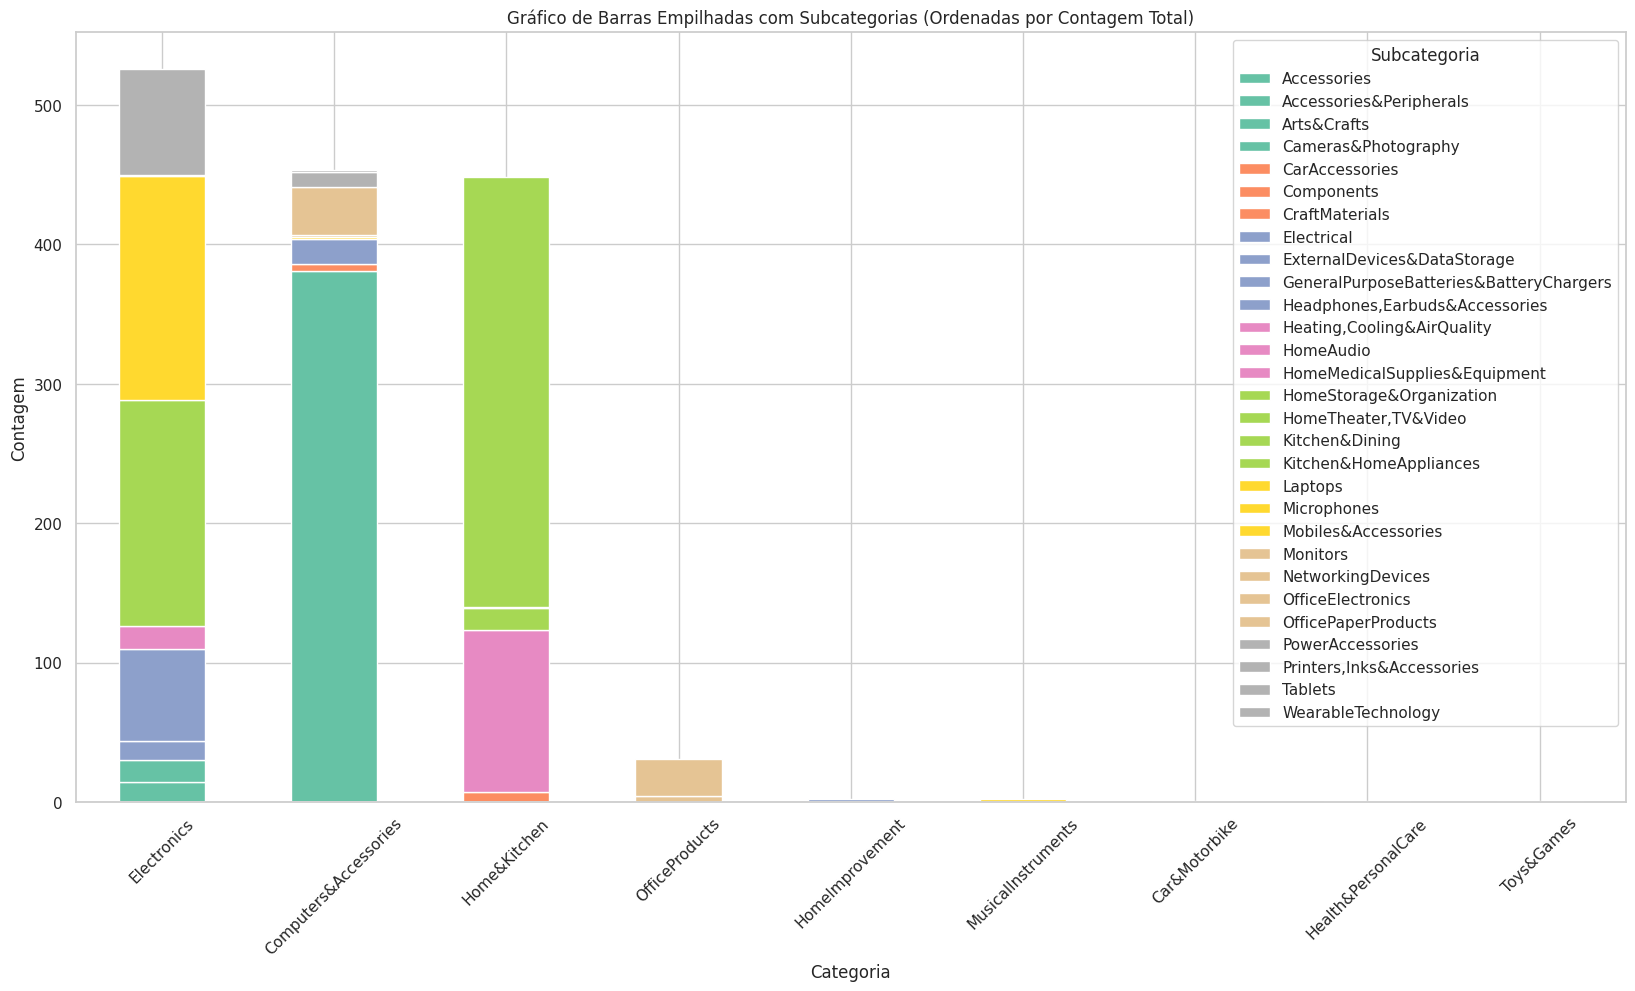

In [ ]:
plt.figure(figsize=(20, 10))

# Calcula a contagem total de subcategorias em cada categoria
total_counts = dados.groupby('categoria')['subcategoria'].count().sort_values(ascending=False).index

# Reordena o DataFrame com base na ordem das categorias ordenadas
dados['categoria'] = pd.Categorical(dados['categoria'], categories=total_counts, ordered=True)

# Agrupe seus dados para contar as ocorrências de subcategorias dentro de cada categoria
agg_data = dados.groupby(['categoria', 'subcategoria']).size().unstack().fillna(0)

# Crie um gráfico de barras empilhadas
agg_data.plot(kind='bar', stacked=True, figsize=(20, 10), colormap='Set2')

plt.title('Gráfico de Barras Empilhadas com Subcategorias (Ordenadas por Contagem Total)')
plt.xlabel('Categoria')
plt.ylabel('Contagem')
plt.legend(title='Subcategoria', loc='upper right')
plt.xticks(rotation=45)  # Para melhorar a legibilidade dos rótulos do eixo x

plt.show()

# Conclusões

# Conclusão da Análise Exploratória de Dados

Neste notebook de análise exploratória de dados, exploramos um conjunto de dados que continha informações valiosas sobre produtos em diferentes categorias e subcategorias. Durante nossa análise, concentramos nossos esforços em compreender a distribuição dos valores dos produtos, bem como a contagem de produtos por categoria e subcategoria.


## Aqui estão algumas das principais conclusões da nossa análise:


### Distribuição de Valores dos Produtos:

Observamos que a maioria dos produtos possui valores menores que R$50, o que sugere uma grande concentração de produtos de baixo custo. Cruzando essa informação com o fato de maior parte dos produtos do data frame serem eletronicos e acessorios de computador, podemos ter uma ideia de que o alto volume dos produos nesta faixa de preço se dá pela necessidade constante de fones, carregadores e cabos que precisam de substituição.
A faixa entre 50 e 500 unidades monetárias também apresentou uma quantidade significativa de produtos, indicando uma variedade considerável de preços médios.
Produtos com valores superiores a 500 unidades monetárias foram menos comuns, mas ainda representaram uma parte importante do conjunto de dados.



###Distribuição por Categoria e Subcategoria:

  Por meio de gráficos de distribuição de valores, exploramos como diferentes categorias e subcategorias de produtos se comportam em termos de preço.
Podemos perceber que a maior parte dos produtos foram os eletronicos, seguido por acessórios de computação e aparatos de casa e cozinha. Tanto os eletrônicos como acessórios de computação são itens de grande demanda nos dias de hoje, sendo necessários reposição frequente para que smartphones e computadores possam ser melhor aproveitados e oferecerem maior satisfação.

###Distribuição por Avaliação:

Através da análise de gráfico, mostrou-se que a nota de avaliação mais presente foi a de 4,5. Mas em maioria, as notas presentes são todas próximas do 4,5, o que pode se tomar como sinal de que os produtos em sua maioria atendem as necessidades de seus consumidores e seus vendedores são competentes.

## Conclusões Finais

Pode se perceber que a Amazon atende a inumeras necessidades de seus compradores e que fornece produtos de confiabilidade. Percebe-se também que o que seus vendedores mais vendem são periféricos eletrônicos, atendendo a necessidade da tecnologia do dia-a-dia.